##### Time Series Analysis 

Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math


Load Dataset

In [15]:
file_path = 'sales_data.csv'
data = pd.read_csv(file_path)
data

,Date,Sales
0,2022-01-01,110.794951
1,2022-01-02,99.504491
2,2022-01-03,116.632148
3,2022-01-04,135.546809
4,2022-01-05,101.809960
...,...,...
725,2023-12-27,490.685425
726,2023-12-28,496.141605
727,2023-12-29,504.133160
728,2023-12-30,487.795442


Plot the Series

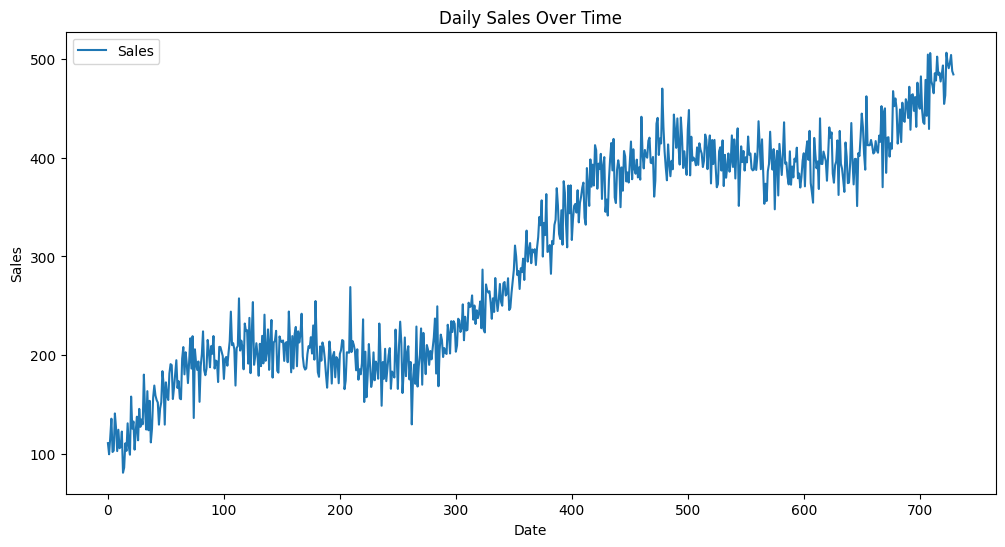

In [3]:
plt.figure(figsize=(12,6))
plt.plot(data["Sales"], label="Sales")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

Decompose Time Series

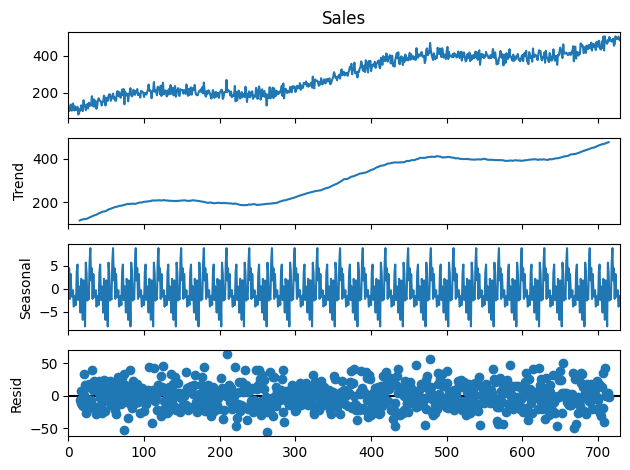

In [ ]:
decomposition = seasonal_decompose(data["Sales"], model="additive", period=30)
decomposition.plot()
plt.show()

 Moving Average

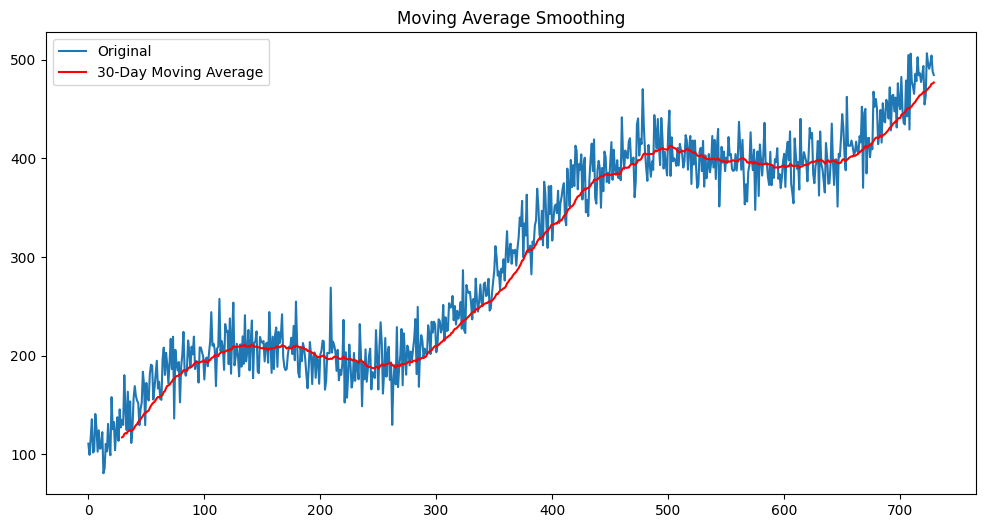

In [5]:
data["MA_30"] = data["Sales"].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(data["Sales"], label="Original")
plt.plot(data["MA_30"], label="30-Day Moving Average", color="red")
plt.title("Moving Average Smoothing")
plt.legend()
plt.show()

Exponential Smoothing

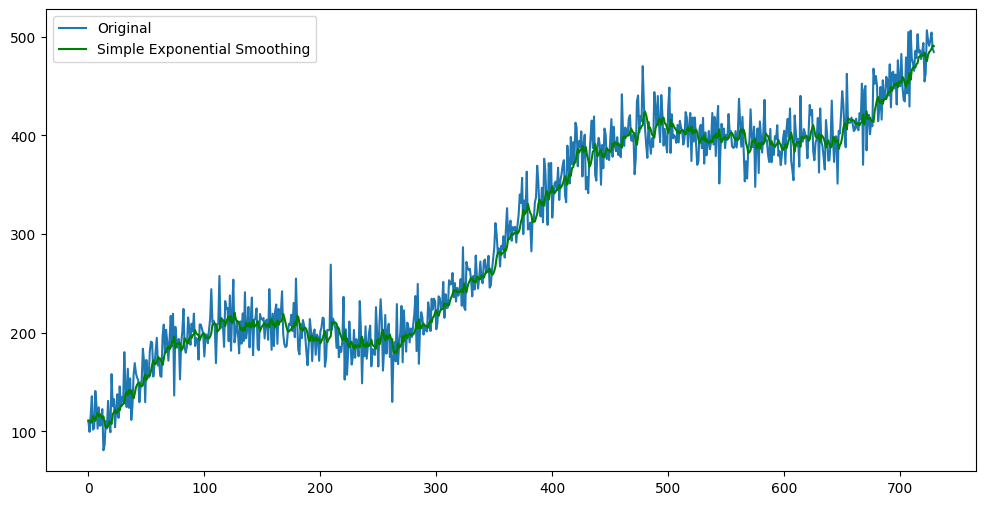

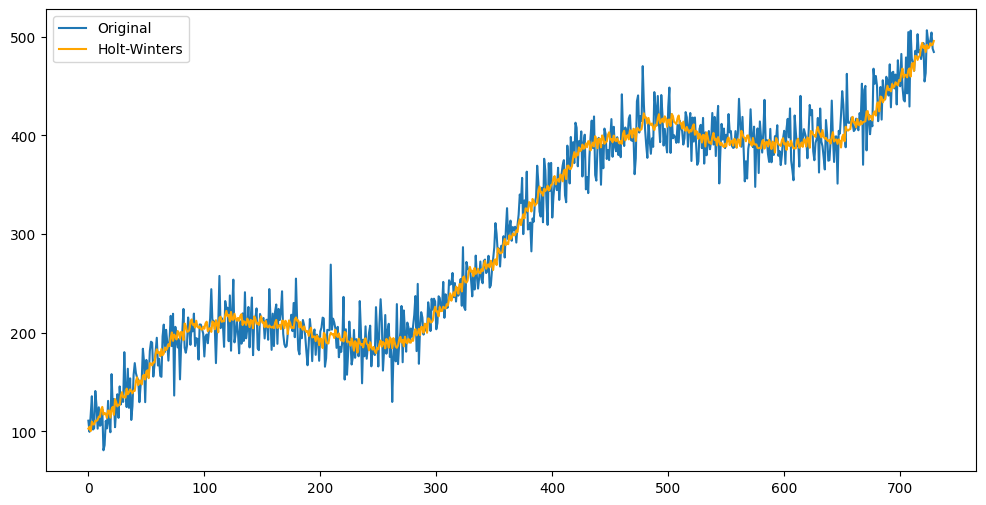

In [6]:
exp_model = SimpleExpSmoothing(data["Sales"]).fit(smoothing_level=0.2, optimized=False)
data["SES"] = exp_model.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(data["Sales"], label="Original")
plt.plot(data["SES"], label="Simple Exponential Smoothing", color="green")
plt.legend()
plt.show()

# Holt-Winters (trend + seasonality)
hw_model = ExponentialSmoothing(data["Sales"], trend="add", seasonal="add", seasonal_periods=30).fit()
data["HW"] = hw_model.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(data["Sales"], label="Original")
plt.plot(data["HW"], label="Holt-Winters", color="orange")
plt.legend()
plt.show()

Train-Test Split

In [7]:
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]


 Build ARIMA Model

In [8]:
model = ARIMA(train["Sales"], order=(5,1,2))  # (p,d,q) chosen arbitrarily
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  584
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2598.161
Date:                Sat, 06 Sep 2025   AIC                           5212.321
Time:                        20:05:24   BIC                           5247.267
Sample:                             0   HQIC                          5225.942
                                - 584                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2844      2.353     -0.121      0.904      -4.897       4.328
ar.L2         -0.1215      0.257     -0.473      0.636      -0.624       0.381
ar.L3         -0.0562      0.219     -0.256      0.7

 Forecast

In [ ]:
forecast = model_fit.forecast(steps=len(test))
test["Forecast_ARIMA"] = forecast.values


Visualization of Forecast

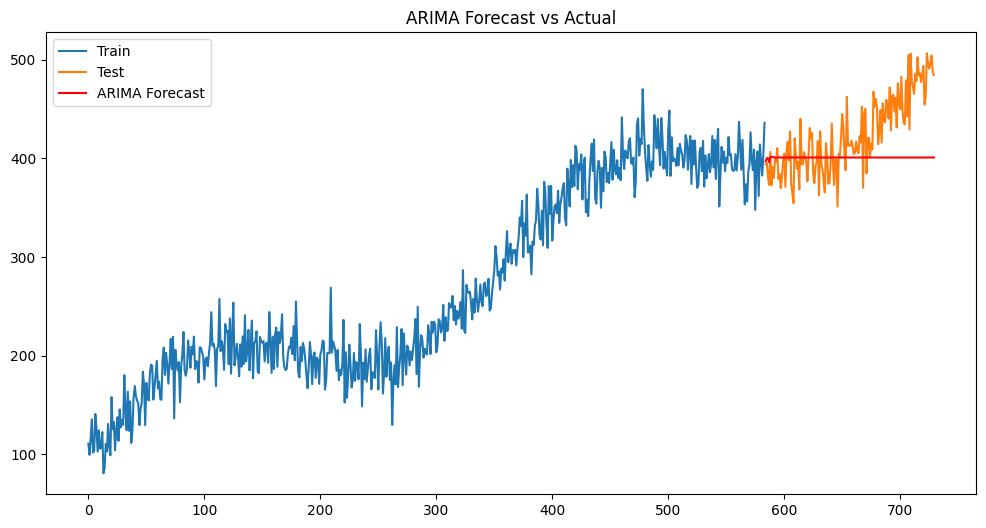

In [10]:
plt.figure(figsize=(12,6))
plt.plot(train["Sales"], label="Train")
plt.plot(test["Sales"], label="Test")
plt.plot(test["Forecast_ARIMA"], label="ARIMA Forecast", color="red")
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()

Model Evaluation

In [16]:
rmse = math.sqrt(mean_squared_error(test["Sales"], test["Forecast_ARIMA"]))
print("RMSE (ARIMA):", rmse)

RMSE (ARIMA): 44.87072375497899
